# Heart Disease Classification 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
#Reading Data
Data=pd.read_csv('heart.csv')
df=Data.copy()


In [5]:
#Display DataFrame
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [99]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Data Exploration & Visualization

#### Target Value Analysis

In [95]:
df.shape

(303, 23)

In [7]:
#Calculating No. target values
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

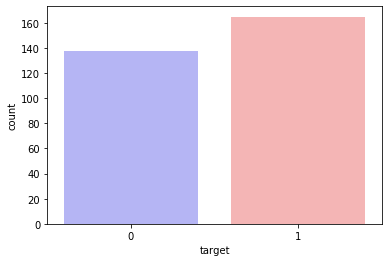

In [8]:
#Graphical representation of target values
sns.countplot(x='target',data=df,palette='bwr')
plt.savefig('Target_0_1.png')
plt.show()

In [9]:
count_HaveDisease=len(df[df.target==1])
count_NoDisease=len(df[df.target==0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_HaveDisease / (len(df.target))*100)))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((count_NoDisease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%


#### Male and Female Patients

In [10]:
count_Female=len(df[df.sex==0])
count_Male=len(df[df.sex==1])
print("Percentage of Female Patients: {:.2f}%".format((count_Female / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_Male / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


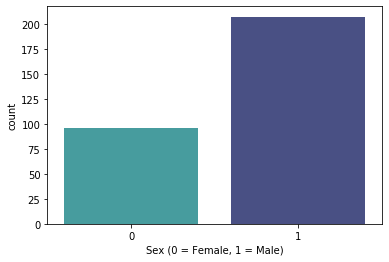

In [11]:
sns.countplot(x='sex',data=df,palette='mako_r')
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.savefig('MaleFemale.png')
plt.show()

#### Group By Target Value of all Features

In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


#### Heart Disease Frequency for Ages

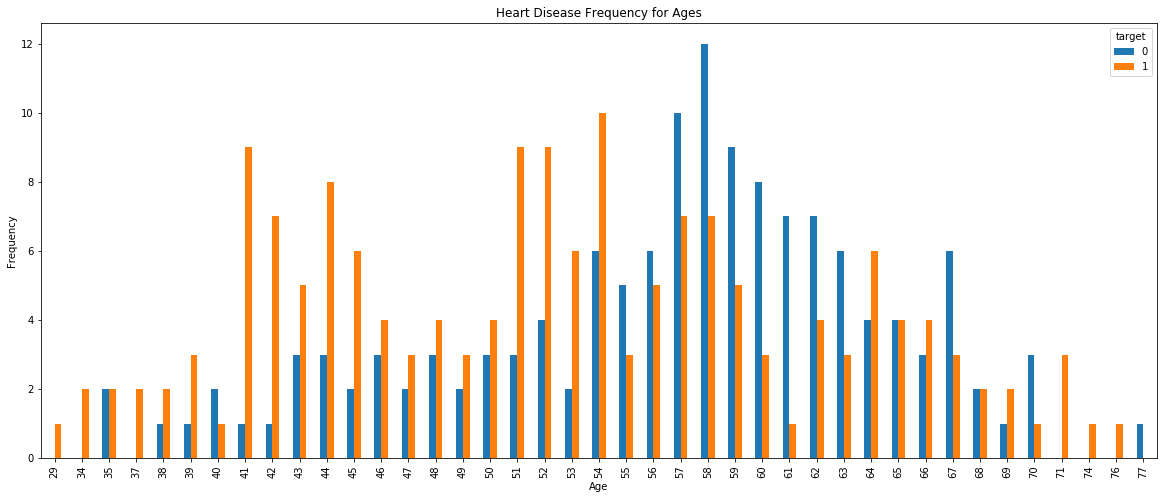

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### Heart Disease Frequency for Gender

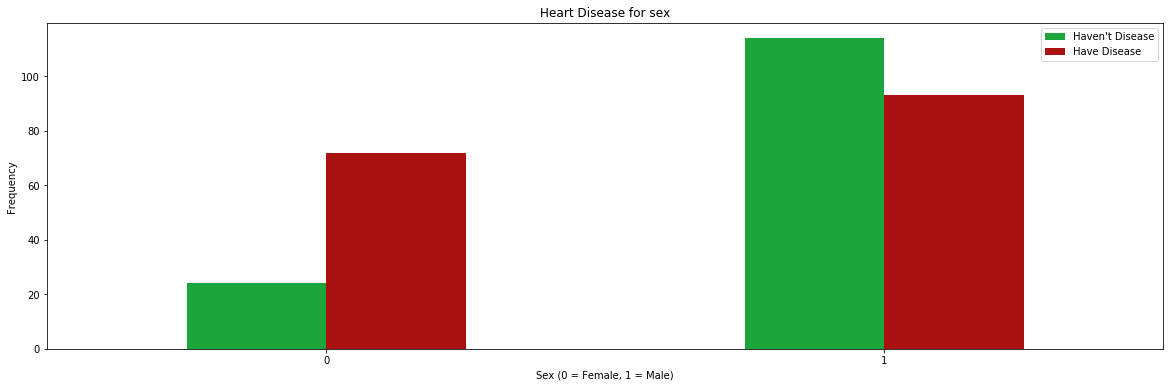

In [14]:
pd.crosstab(df.sex,df.target).plot(kind='bar', figsize=(20,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease for sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseForSex.png')
plt.show()

#### Heart Disease Frequency for Slope

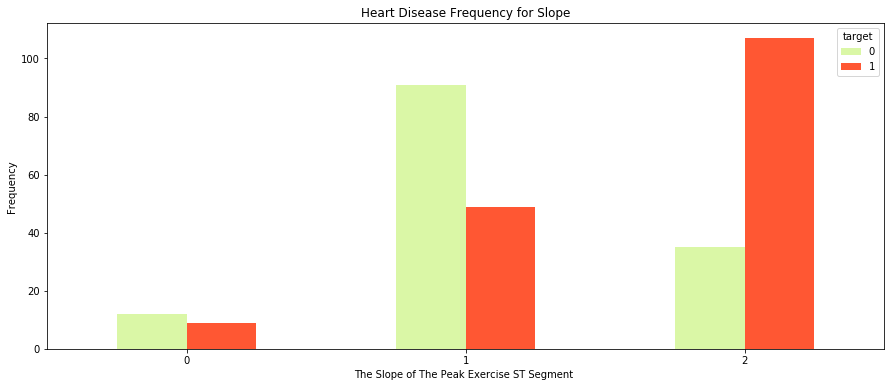

In [15]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.savefig("HeartDisease_againtsSlope.png")
plt.show()

#### Heart Disease Frequency according to FBS

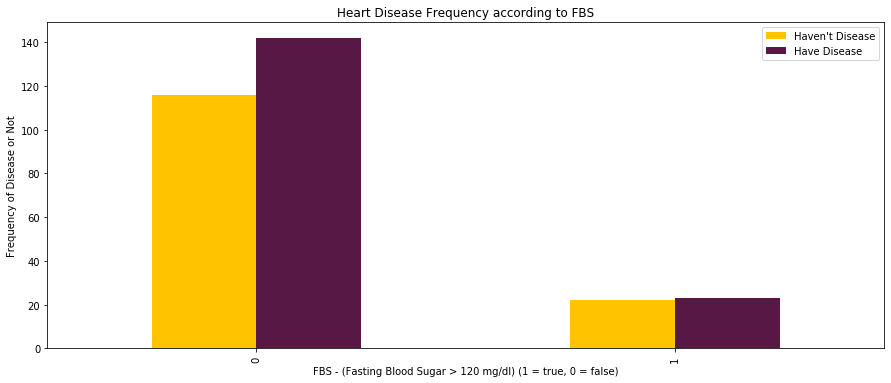

In [16]:
pd.crosstab(df.fbs,df.target).plot(kind='bar',figsize=(15,6), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency according to FBS')
plt.ylabel("Frequency of Disease or Not")
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true, 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig("HeartDisease_againtFBS.png")
plt.show()

#### Heart Disease Frequency against Chest Pain

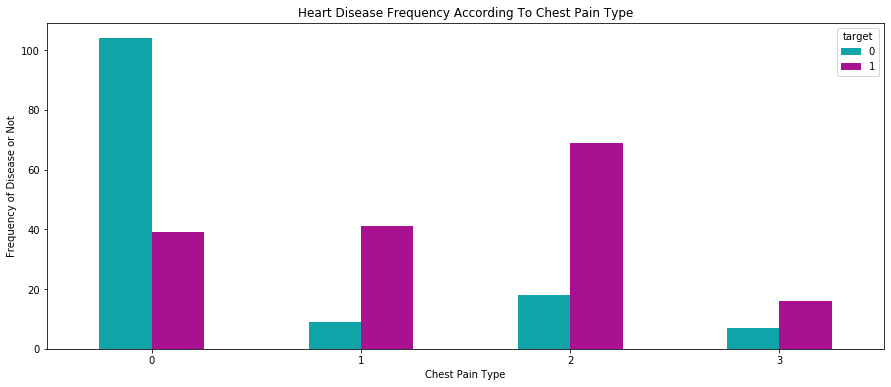

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.savefig("HeartDisease_againstChestPain.png")
plt.show()

#### Heart Disease against Age Vs Heart Rate

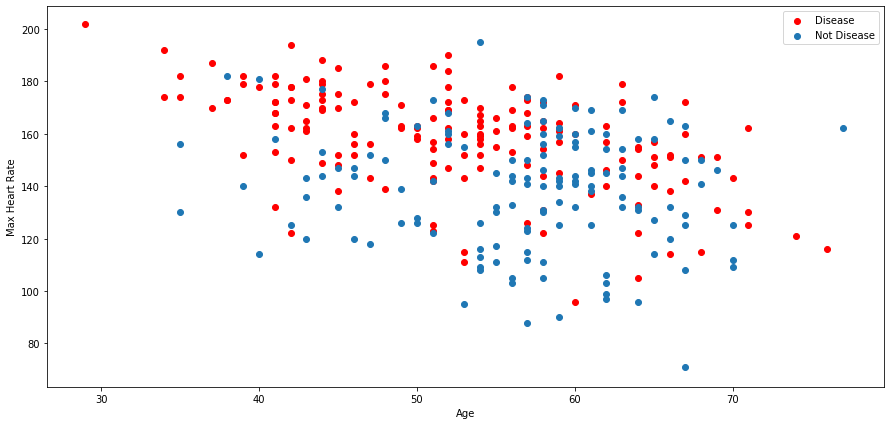

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0])
plt.legend(["Disease","Not Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.savefig("ScatterPlot_Disease_NotDisease.png")
plt.show()
#Below graph shows Heart Disease Exists mostly if heart rate is high and age is less than ~58

# Handling Missing & Categorical Values

In [19]:
#Checking if theres any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Handling Categorical Variables

In [20]:
#Since 'cp', 'thal', 'sex' and 'slope' are categorical variables we'll turn them into dummy variables.
df_cat = pd.get_dummies(df,columns = ['sex','cp','thal','slope'])

In [21]:
df=pd.DataFrame(df_cat, columns = df_cat.columns)


In [22]:
#Lets display the dataframe
df.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,145,233,1,0,150,0,2.3,0,1,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,0,1,187,0,3.5,0,1,...,0,1,0,0,0,1,0,1,0,0
2,41,130,204,0,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,0,1
3,56,120,236,0,1,178,0,0.8,0,1,...,1,0,0,0,0,1,0,0,0,1
4,57,120,354,0,1,163,1,0.6,0,1,...,0,0,0,0,0,1,0,0,0,1


# Basic Descriptive Statistics

In [23]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,0.544554,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.498835,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


# Preparing data for models

In [29]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler

In [30]:
mms = MinMaxScaler()

In [31]:
df_scaled = mms.fit_transform(df)

In [32]:
df = pd.DataFrame(df_scaled, columns = df.columns)

In [33]:
df.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Data Splitting

In [34]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
#Creating Independent and Dependent Variables
X = df.drop(columns='target')
Y = df['target']

In [36]:
print('Original Data Set Size: ',df.shape)
print('Independent Variable X size: ',X.shape)
print('Target Variable Y size: ',Y.shape)


Original Data Set Size:  (303, 23)
Independent Variable X size:  (303, 22)
Target Variable Y size:  (303,)


In [37]:
#Splitting Data into training and testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=100)

#                                                Applying Models

## 1. Logistic Regression

In [112]:
logisticRegr_ = LogisticRegression()
logisticRegr_.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
lr_pred = logisticRegr_.predict(xtest)

### Logistic Results: 

In [114]:
lr_acc = accuracy_score(ytest,lr_pred)
print("Logistic Regression : {}% ".format(lr_acc))

Logistic Regression : 0.9010989010989011% 


In [41]:
accuracies = {}
accuracies['Logistic Regression'] = lr_acc

# 2. K-Nearest Neighbors 

In [42]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k

In [43]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [44]:
knn_pred = knn.predict(xtest)

In [45]:
knn_acc= accuracy_score(ytest,knn_pred)

In [46]:
print("KNN : {}% ".format(knn_acc))

KNN : 0.8351648351648352% 


In [47]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(xtrain,ytrain)
    pred_i = knn2.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))


Text(0, 0.5, 'Error Rate')

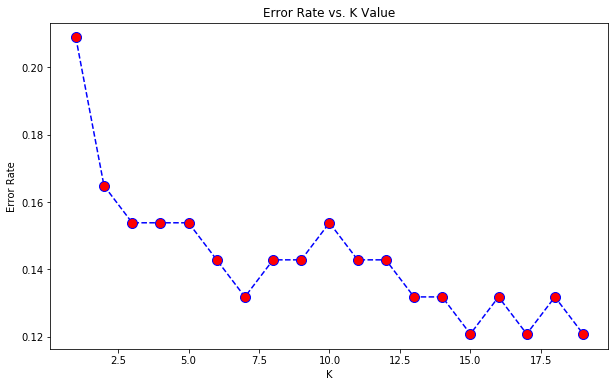

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
knn3 = KNeighborsClassifier(n_neighbors = 7)  # now putting k =7

In [50]:
knn3.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [51]:
knn_updated = knn3.predict(xtest)

In [52]:
knn_updated_acc = accuracy_score(ytest,knn_updated)

### KNN Results: 

In [53]:
print("KNN after updating k value : {}%".format(knn_updated_acc))

KNN after updating k value : 0.8681318681318682%


In [54]:
accuracies['KNN'] = knn_updated_acc

# 3. Decision Tree 

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


In [56]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
dtc_pred = dtc.predict(xtest)

In [93]:
dtc_acc = accuracy_score(ytest,dtc_pred)
accuracies['DT'] = dtc_acc


### Decision Tree Results: 

In [84]:
print("Decision Tree Classifier : {}% ".format(dtc_acc))

Decision Tree Classifier : 0.7362637362637363% 


# 4. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 10)

In [61]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rfr_pred = rfr.predict(xtest)

### Random Forest Results: 

In [86]:
rfr_acc = accuracy_score(ytest,rfr_pred)
print("Random Forest : {}%".format(rfr_acc))

Random Forest : 0.8131868131868132%


In [87]:
accuracies['Random Forest'] = rfr_acc

# PCA

In [103]:
from sklearn.decomposition import PCA
pca = PCA(.95)
#Retaining 95% of information

In [104]:
pca.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### No. Of components

In [105]:
pca.n_components_

12

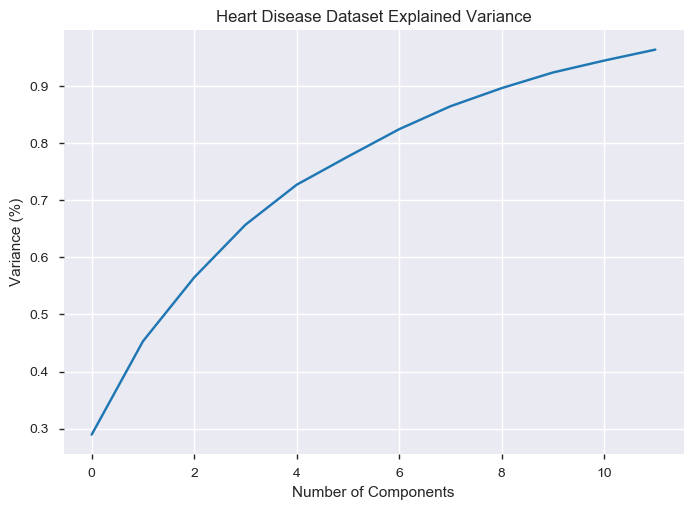

In [106]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Heart Disease Dataset Explained Variance')
plt.show()

# 5. Logistic after using PCA 

In [107]:
pca_xtrain = pca.transform(xtrain)
pca_xtest = pca.transform(xtest)
logisticRegr.fit(pca_xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
logisticRegr.predict(pca_xtest)

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1.])

### Results: 

In [109]:
logisticRegr.score(pca_xtest,ytest)

0.9010989010989011

# 6. SVM


In [72]:
from sklearn.svm import SVC
svm = SVC()


In [73]:
svm.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
svm_pred = svm.predict(xtest)

### SVM Results: 

In [75]:
svm_acc = accuracy_score(ytest,svm_pred)
print("SVM : {}%".format(svm_acc))

SVM : 0.8461538461538461%


In [76]:
accuracies['SVM'] = svm_acc


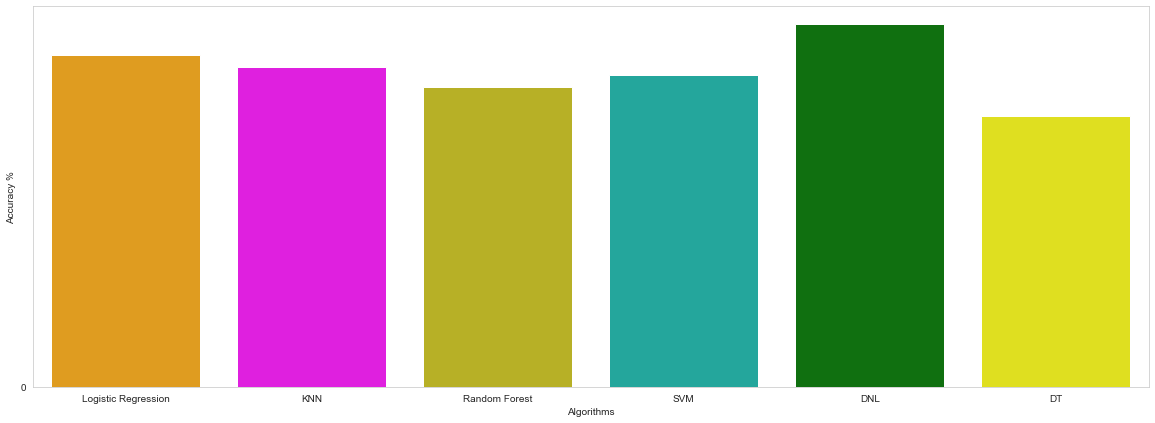

In [94]:
colors = ["orange", "magenta","#CFC60E","#0FBBAE","Green","Yellow"]
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.savefig("Comparion_all_algo.png")
plt.show()

#### Our models work fine but best of them are Deep Learning and Logistic Regression with 98.35% and 90.1% of accuracy respectively. Let's look their confusion matrixes.

## Confusion Matrix

In [115]:
# Predicted values
y_head_lr = logisticRegr_.predict(xtest)
knn3 = KNeighborsClassifier(n_neighbors = 7)
knn3.fit(xtrain, ytrain)
y_head_knn = knn3.predict(xtest)
y_head_svm = svm.predict(xtest)
y_head_dtc = dtc.predict(xtest)
y_head_rf = rfr.predict(xtest)

In [116]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(ytest,y_head_lr)
cm_knn = confusion_matrix(ytest,y_head_knn)
cm_svm = confusion_matrix(ytest,y_head_svm)
cm_dtc = confusion_matrix(ytest,y_head_dtc)
cm_rf = confusion_matrix(ytest,y_head_rf)

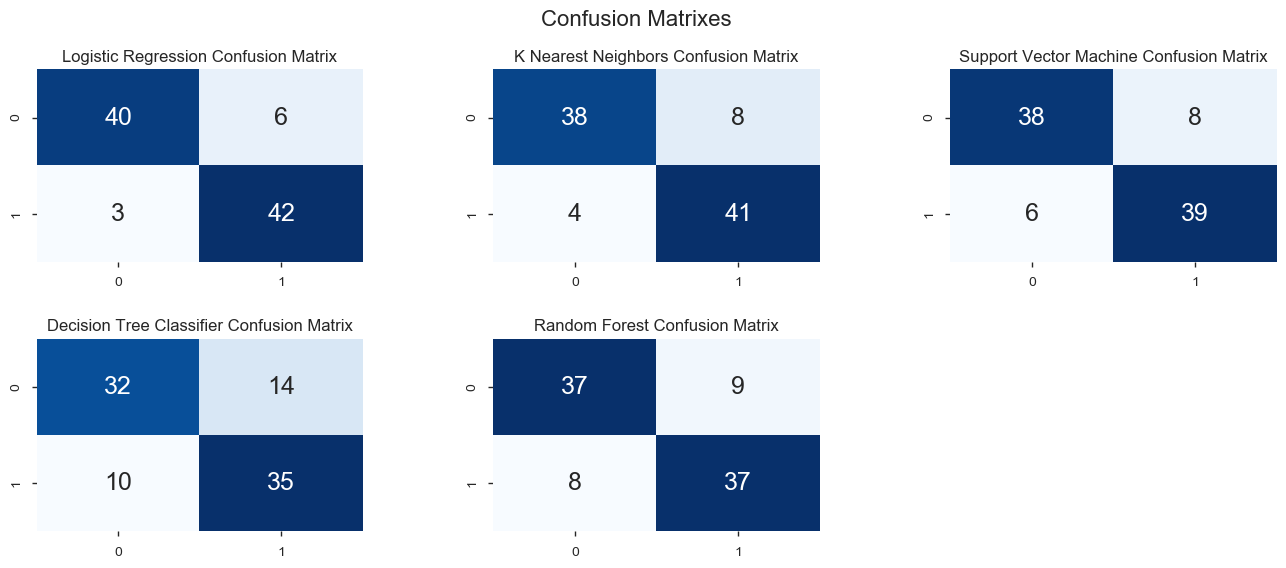

In [118]:
plt.figure(figsize=(16,6))

plt.suptitle("Confusion Matrixes",fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.savefig("ConfusMatrix")
plt.show()